# PCA

In [12]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import math
from sklearn.decomposition import PCA
import requests


In [13]:
# loading the data
url="https://raw.githubusercontent.com/KelvinYQC/msia420PA_project/6bb5fe63050105194819f99c90476486076e5227/Data/Hotel%20Reservations.csv"
df=pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [14]:
# drop the response variable
df.drop(['Booking_ID', 'booking_status'], axis=1, inplace=True)
dropping = []
for col in df:
    if df[col].dtypes == "object":
        dropping.append(col)
dropping

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [15]:
df= df.drop(dropping,axis=1)
df = pd.get_dummies(df)

In [25]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# fitting
scalar.fit(df)
df_std = scalar.transform(df)

In [19]:
# run PCA
n_components = 10
pca = PCA(n_components=n_components)
pca_fit = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data = pca_fit
                      , columns = ['PC '+ str(i+1) for i in range(n_components)])

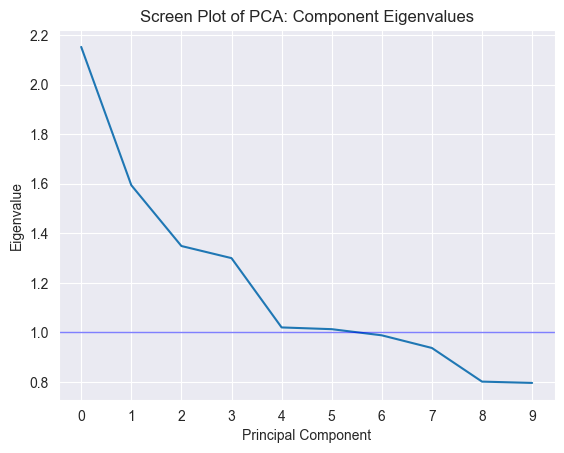

In [20]:
# check the Screen plot
ax = plt.figure().gca()
ax.plot(pca.explained_variance_)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, linewidth=1, color='b', alpha=0.5)
plt.title('Screen Plot of PCA: Component Eigenvalues')
plt.show()

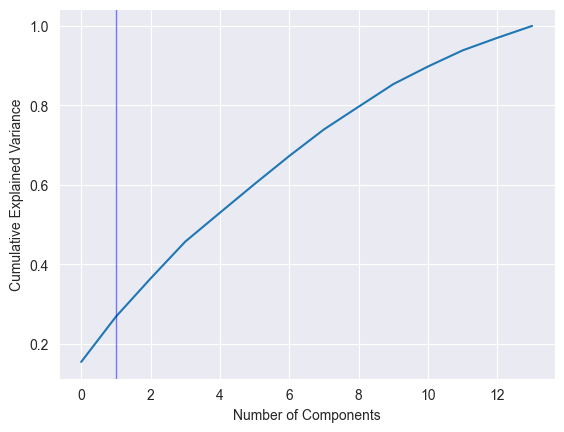

In [21]:
# check the variance explained from PCA
ax = plt.figure().gca()
pca = PCA().fit(df_std)
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.axvline(x=1, linewidth=1, color='b', alpha=0.5)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [22]:
# check the loading for PCA elements
loadings = pca.components_
results = pd.DataFrame(loadings)
results.index=df.columns
print(results[0].sort_values(ascending=True))

lead_time                              -0.432807
no_of_previous_bookings_not_canceled   -0.429218
no_of_adults                           -0.293649
avg_price_per_room                     -0.120011
required_car_parking_space             -0.114405
arrival_year                           -0.111549
no_of_weekend_nights                   -0.006604
repeated_guest                          0.033542
no_of_previous_cancellations            0.154484
no_of_special_requests                  0.238295
no_of_week_nights                       0.248083
no_of_children                          0.283716
arrival_month                           0.353457
arrival_date                            0.391786
Name: 0, dtype: float64


In [23]:
# run PCA with 1 component
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(df_std)
x_pca = pca.transform(df_std)



In [24]:
# output the csv file
x_pca_df = pd.DataFrame(x_pca)
x_pca_df.to_csv("PCA_dat.csv")